# Découvrez les librairies Python pour la Data Science
## Le problème de Monty Hall


En changeant de porte, le joueur a gagné 6621 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3283 sur 10000 parties.


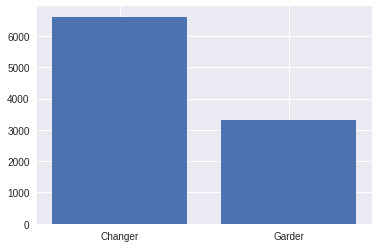

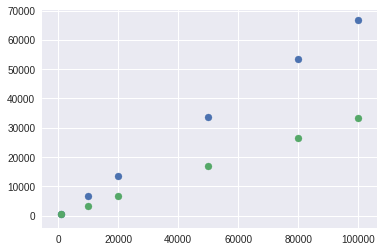

In [7]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

def play(strategie, nb_tours):
  '''Simule une suite de tours du jeu.

  Cette fonction renvoie les résultats de plusieurs parties
  du jeu Monty Hall sous forme d'une liste de gains par le 
  joueur.

  Args:
      strategie (Strategie): La strategie du joueur
      nb_tours (int): Nombre de tours

  Returns:
      list: Liste des gains du joueurs à chaque partie
  '''

  # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
  # le cours "Apprenez à programmer en Python" sur OpenClassrooms
  return [1 if play_game(strategie) else 0 for i in range(nb_tours)]


print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

# plot renvoie un objet, que l'on pourra manipuler plus tard pour
# personnaliser le graphique

plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.GARDER, 10000))], 
        tick_label=["Changer","Garder"])

# évolution des gains selon les stratégies
gains_changer = []
gains_garder = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

#la fonction  figure crée un graphique. Les appels suivants aux fonctions
#telles que  scatter  et  plot  génèrent des courbes sur ce même graphique.

figure = plt.figure()                            
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])


### to do : implémenter une stratégie où le joueur change de stratégie de façon aléatoire

### La statistique expliquée à mon chat :
https://www.youtube.com/channel/UCWty1tzwZW_ZNSp5GVGteaA

## Le théorème central limite
Toute somme de variables aléatoires indépendantes et identiquement distribuées tend vers une variable aléatoire distribuée normalement.


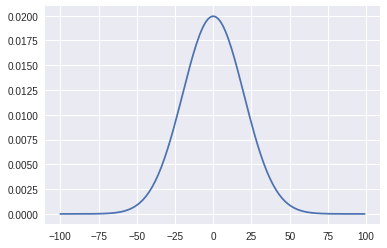

In [8]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp

domaine = range(-100,100)
mu = 0
sigma = 20

# fonction lambda 
f = lambda x : 1/(sqrt(2*pi*pow(sigma,2))) * exp(-pow((x-mu),2)/(2*pow(sigma,2)))

y = [f(x) for x in domaine]
plot = plt.plot(domaine, y)

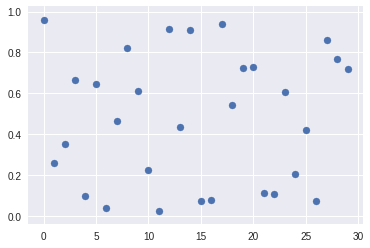

In [9]:
vecteur_aleatoire = np.random.rand(30)
plot = plt.scatter(range(30),vecteur_aleatoire)

[[0.0598109  0.38343539 0.05685044 0.19801969 0.93909962]
 [0.03538109 0.75351076 0.38155229 0.06082163 0.46986484]
 [0.71140648 0.66950701 0.8898383  0.1375476  0.28546279]]


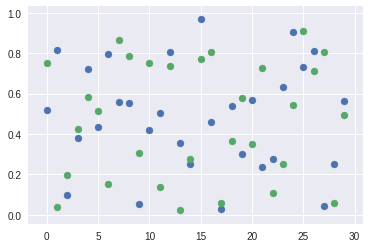

In [12]:
matrice_aleatoire_a_imprimer = np.random.rand(3,5)
print(matrice_aleatoire_a_imprimer)
matrice_aleatoire_a_grapher = np.random.rand(2,30)
fig = plt.figure()
# [0, :] indique la première ligne et toute les colonnes de la matrice
plot1 = plt.scatter(range(30),matrice_aleatoire_a_grapher[0,:]) 
# [0, :] indique la deuxième ligne et toute les colonnes de la matrice
plot2 = plt.scatter(range(30),matrice_aleatoire_a_grapher[1,:])   

In [23]:
#3 échantillons de 5 individus chacun.
matrice_aleatoire = np.random.rand(3,5)   

somme_colonnes = np.sum(matrice_aleatoire,0)
somme_lignes = np.sum(matrice_aleatoire,1)

print(somme_colonnes)
print("La taille de la variable somme_colonnes est {}.".format(somme_colonnes.shape))
print(somme_lignes)
print("La taille de la variable somme_lignes est {}.".format(somme_lignes.shape))


[1.66343138 2.08316279 1.52785232 0.49080831 1.76486424]
La taille de la variable somme_colonnes est (5,).
[1.3984529  2.8802541  3.25141204]
La taille de la variable somme_lignes est (3,).


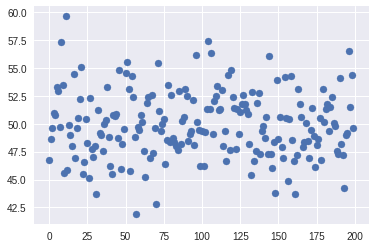

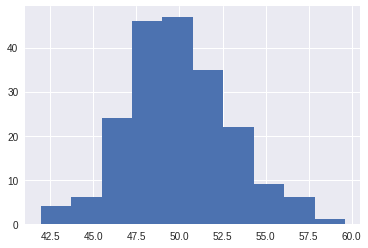

In [35]:
# Nous allons considérer 100 variables aléatoires uniformément distribuées sur
# [0 ; 1]. Pour chacune on prend un échantillon de taille 200.
matrice_aleatoire = np.random.rand(100,200)
# On calcule la sommes des valeurs pour chacune des 200 colonnes. 
# Nous avons créé un échantillon de taille 200 d'une nouvelle variable 
# aléatoire. Cette nouvelle variable aléatoire est la somme des 100 variables
# aléatoires identiquement distribuées que nous avions au départ.
sommes = np.sum(matrice_aleatoire,0)

fig2 = plt.figure()
plot2 = plot = plt.scatter(range(200), sommes)
fig1 = plt.figure()
plot = plt.hist(sommes)

La moyenne empirique de notre distribution est 500.20509172237905.
La moyenne empirique de la variable généré par la fonction rand est 0.49600675089603913.
La variance empirique de notre distribution est 83.78171808544892.
La variance empirique de la variable généré par la fonction rand est 0.08299473750121228.


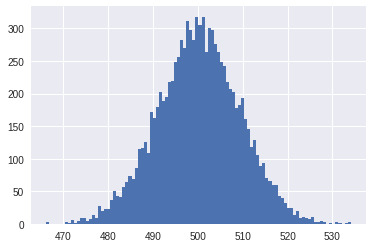

In [46]:
matrice_aleatoire = np.random.rand(1000,10000)
sommes = np.sum(matrice_aleatoire,0)
#bins définit le nombres de classes.
plot = plt.hist(sommes, bins=100)    
# la moyenne de la nouvelle distribution est la somme des moyennes 
print("La moyenne empirique de notre distribution est {}."
      .format(np.mean(sommes)))
# X ~ loi uniforme sur [0 ; 1] donc E(X) = 0,5
print("La moyenne empirique de la variable généré par la fonction rand est {}."
      .format(np.mean(np.random.rand(10000))))
# la variance de la nouvelle distribution est la somme des variances 
print("La variance empirique de notre distribution est {}."
      .format(np.var(sommes)))
print("La variance empirique de la variable généré par la fonction rand est {}."
      .format(np.var(np.random.rand(10000))))